In [14]:
import matplotlib.pyplot as plt
import os,sys
import numpy as np
# from dadapy._utils.stochastic_minimization_hamming import *
from dadapy.hamming import *
sys.path.append('../')
from paths import *

rcpsize = 20
plt.rcParams['xtick.labelsize']= rcpsize
plt.rcParams['ytick.labelsize']=rcpsize
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = rcpsize
plt.rcParams.update({'figure.autolayout': True})
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['ggplot']['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['seaborn-v0_8']['axes.prop_cycle'].by_key()['color']
# colors = plt.style.library['seaborn-v0_8-dark-palette']['axes.prop_cycle'].by_key()['color']
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
# print(plt.rcParams.keys())
#np.set_printoptions(precision=None)
markers = ['p','o','h','^','s','*']
plot_id = 0

In [2]:
L = 30

Ns = 5000
Nsteps = int(1E6)
delta = 5E-4
alphamin = 0
alphamax = .1
histfolder = f'distances/results/hist/'

In [6]:
eps = 1E-7 
T_list = np.arange(1.8,3+eps,.1)

ID_BID = np.zeros(shape=(len(T_list),))
ID_GRIDE = np.zeros(shape=ID_BID.shape)
ID_FCI = np.zeros(shape=ID_BID.shape)
ID_I3D = np.zeros(shape=ID_BID.shape)

for T_id,T in enumerate(T_list):
  ### BID
  H = Hamming()
  # H.D_histogram(
  #               T=T,
  #               L=L,
  #               Ns=Ns,
  #               resultsfolder=histfolder,
  #               )
  optfolder0 = f'BID/results/opt/L{L}/T{T:.2f}/'
  B = BID(
          alphamin=alphamin,
          alphamax=alphamax,
          seed=1,
          delta=delta,
          Nsteps=Nsteps,
          optfolder0=optfolder0,
          )
  (_,ID_BID[T_id],_,_,) = B.load_results()
  ### GRIDE
  k = 3
  resultsfolder = makefolder(base=f'Gride/results/gride/',
                          L=L,
                          T=T,
                          )
  ids_gride,ids_err_gride,rs_gride = np.loadtxt(resultsfolder+'gride.txt',unpack=True)
  ID_GRIDE[T_id] = ids_gride[k]
  ### FCI
  resultsfolder = makefolder(base=f'FCI/results/FCI/',
                          create_folder=False,
                          precision=2,
                          global_flag=1,
                          L=L,
                          T=float(T),
                          M_flag=1,
                          )
  ID_FCI[T_id], x0, err = np.loadtxt(resultsfolder + 'FCI_fit.txt')
  ### I3D
  resultsfolder = makefolder(base=f'I3D/results/',
                        create_folder=True,
                        L=L,
                        T=float(T),
                        )
  ID_I3D[T_id],err = np.loadtxt(resultsfolder + f'd.txt')
### CD
resultsfolder = f'CD/results/'
ID_CD = np.loadtxt(resultsfolder + f'ds_L{L}.txt')
### MLE
resultsfolder = f'MLE/results/L_{L}/M_flag_1/'
T_MLE,ID_MLE = np.loadtxt(resultsfolder + f'd.txt',unpack = True)


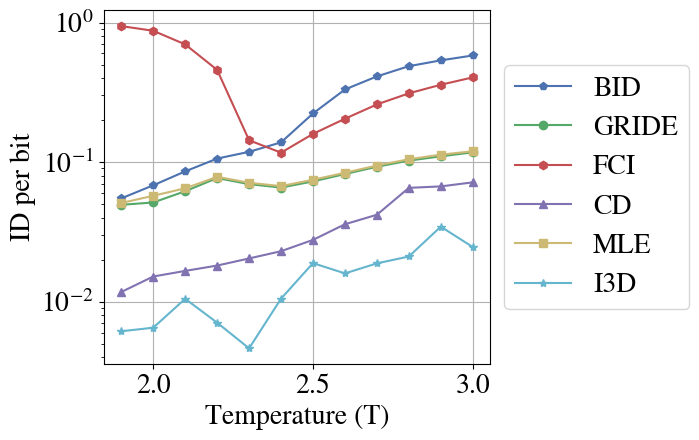

In [23]:
fig,ax = plt.subplots(1)
start = 1
ax.plot(T_list[start:],ID_BID[start:] / L**2,marker=markers[0],label='BID')
ax.plot(T_list[start:],ID_GRIDE[start:]/ L**2,marker=markers[1],label='GRIDE')
ax.plot(T_list[start:],ID_FCI[start:]/ L**2,marker=markers[2],label='FCI')
ax.plot(T_list[start:],ID_CD[start:]/ L**2,marker=markers[3],label='CD')
ax.plot(T_MLE[start:],ID_MLE[start:]/ L**2,marker=markers[4],label='MLE')
ax.plot(T_list[start:],ID_I3D[start:]/ L**2,marker=markers[5],label='I3D')

ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Temperature (T)')
ax.set_ylabel('ID per bit')
# plt.title(f'{L=}')

ax.grid('true')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [24]:
fig.savefig(f'thermal_comparison.pdf',bbox_inches='tight')